In [ ]:
import pandas as pd

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
#visualisation de donnes null
print(df.isnull().sum())

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.

In [ ]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48204, dtype: bool


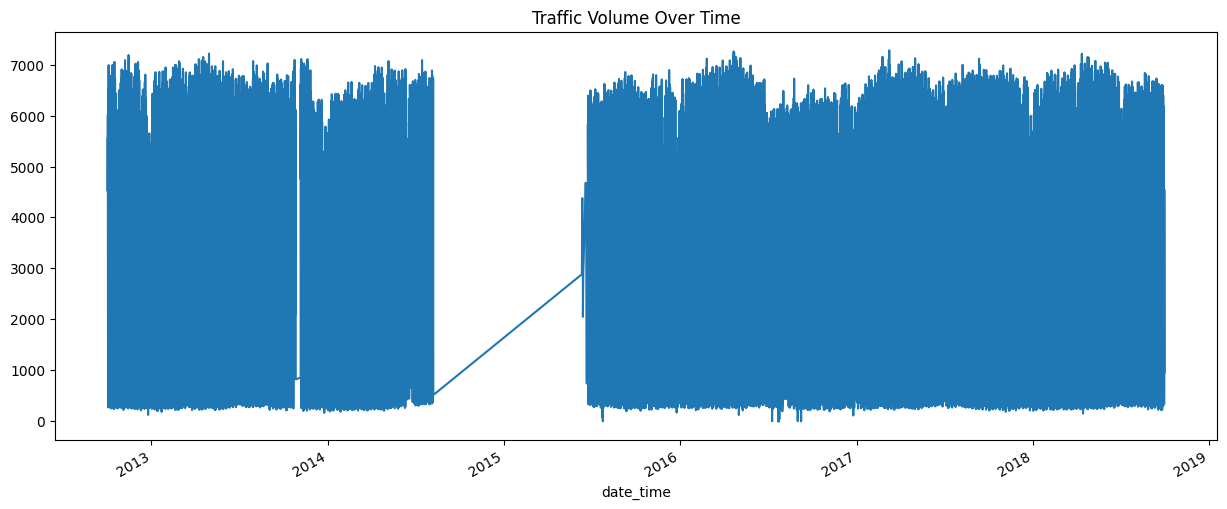

In [ ]:
import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'])  
# Affichage du graphique pour visualiser les donnes
df.set_index('date_time', inplace=True)
df['traffic_volume'].plot(figsize=(15, 6))
plt.title('Traffic Volume Over Time')
plt.show()

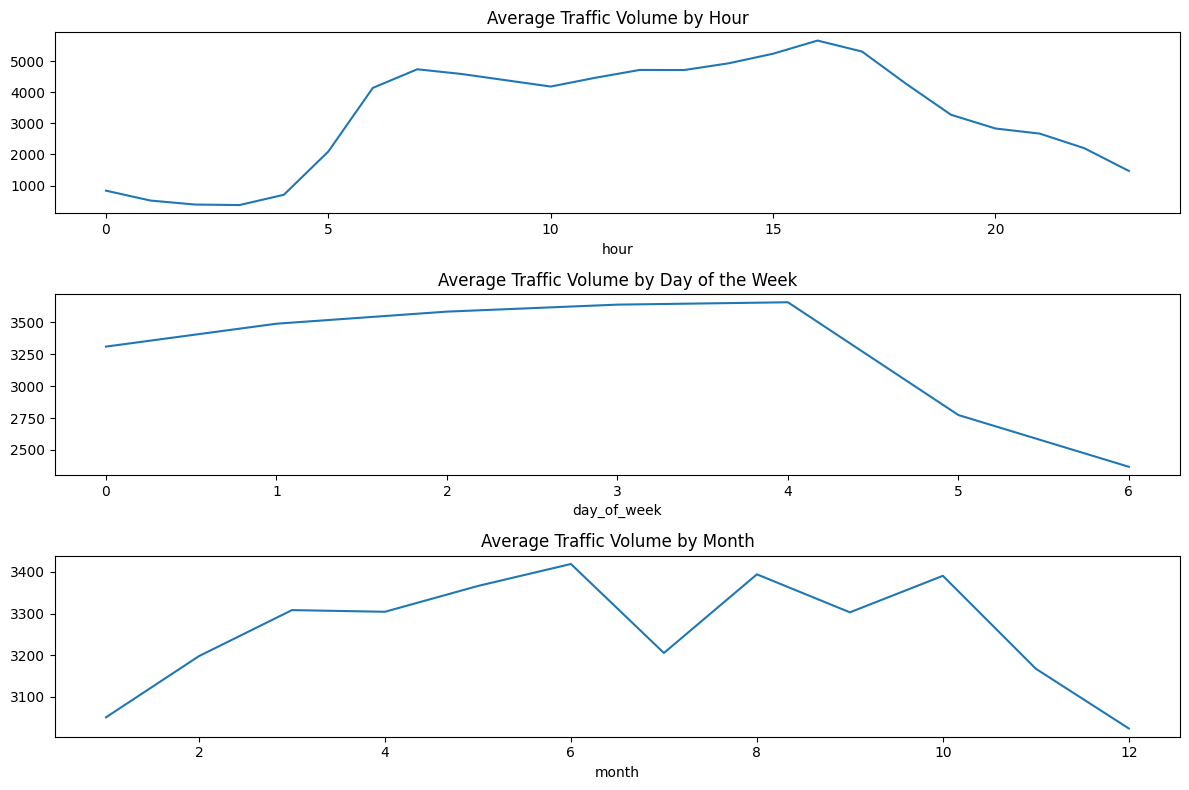

In [ ]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
#visualisation des donnees suivant heur semaine mois pour detecter le ppattern 
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
df.groupby('hour')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Hour')

plt.subplot(3, 1, 2)
df.groupby('day_of_week')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Day of the Week')

plt.subplot(3, 1, 3)
df.groupby('month')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Month')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

print(df['holiday'].head(10))
print(df['holiday'].isnull().sum())

# encodage de holiday data 0 si null on nan 1 sinon
df['is_holiday'] = df['holiday'].apply(lambda x: 0 if pd.isnull(x) or x == 'None' else 1)
print(df[['holiday', 'is_holiday']].head(10))

date_time
2012-10-02 09:00:00    NaN
2012-10-02 10:00:00    NaN
2012-10-02 11:00:00    NaN
2012-10-02 12:00:00    NaN
2012-10-02 13:00:00    NaN
2012-10-02 14:00:00    NaN
2012-10-02 15:00:00    NaN
2012-10-02 16:00:00    NaN
2012-10-02 17:00:00    NaN
2012-10-02 18:00:00    NaN
Name: holiday, dtype: object
48143
                    holiday  is_holiday
date_time                              
2012-10-02 09:00:00     NaN           0
2012-10-02 10:00:00     NaN           0
2012-10-02 11:00:00     NaN           0
2012-10-02 12:00:00     NaN           0
2012-10-02 13:00:00     NaN           0
2012-10-02 14:00:00     NaN           0
2012-10-02 15:00:00     NaN           0
2012-10-02 16:00:00     NaN           0
2012-10-02 17:00:00     NaN           0
2012-10-02 18:00:00     NaN           0


In [ ]:
# visualiser les differents etat du meteo et les compter 
unique_weather = df['weather_main'].unique()
print("Unique values in 'weather_main' column:")
print(unique_weather) 
weather_counts = df['weather_main'].value_counts()
print("Counts of each unique value in 'weather_main' column:")
print(weather_counts)

Unique values in 'weather_main' column:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
Counts of each unique value in 'weather_main' column:
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import joblib
from sklearn.model_selection import train_test_split
print(df.columns)

# enlever data de holiday
df.drop('holiday', axis=1, inplace=True)

print(df.columns)

# encodage One-Hot sur les colonnes catégorielles 
df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], drop_first=True)

# Créer des caractéristiques de retard (lag) et extraire les caractéristiques temporelles
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# enlever les line qui manque du data
df.dropna(inplace=True)

X = df.drop('traffic_volume', axis=1)
max_volume = df['traffic_volume'].max()
y = df['traffic_volume']/ max_volume

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# entrainment du model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'traffic_volume_model.joblib')
# Prediction
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

accuracy = r2 * 100

mae, mse, rmse, r2, accuracy

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'hour', 'day_of_week',
       'month'],
      dtype='object')
Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'hour', 'day_of_week', 'month',
       'is_holiday'],
      dtype='object')
Mean Absolute Error: 0.021964802765432886
Mean Squared Error: 0.001300616591395616
Root Mean Squared Error: 0.03606406232519592


(0.021964802765432886,
 0.001300616591395616,
 0.03606406232519592,
 0.9821963967108955,
 98.21963967108955)

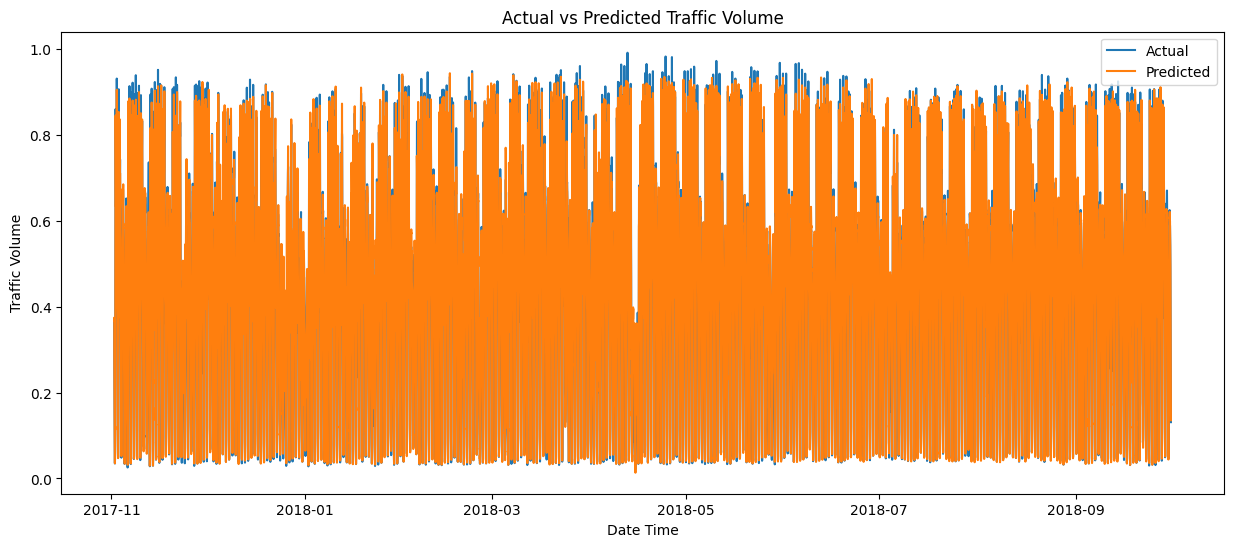

In [ ]:
# desin de volume actuel vs predicte 
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
def adjust_volume_by_distance_and_width(predicted_volume, my_road_km, my_road_width):
    """
    Adjust predicted traffic volume based on both distance and road width.

    Args:
        predicted_volume (float): Volume predicted by the model.
        my_road_km (float): Length of the target road in kilometers.
        highway_km (float): Length of the highway the model was trained on.
        my_road_width (float): Width of your road in meters.
        highway_width (float): Width of the original highway in meters.

    Returns:
        float: Adjusted traffic volume.
    """
    distance_ratio = my_road_km / 12.87
    width_ratio = my_road_width / 0.0355
    adjustment_factor = distance_ratio * width_ratio
    adjusted_volume = predicted_volume * adjustment_factor
    return adjusted_volume
#cette  data concerne autoroute li daro 3lih tests
#0.03048 km to 0.036576 km, or about 30 to 36 meters.
#distance : 12.87km

In [ ]:
from datetime import datetime

# pour la demonstration ,on utilise la meme data du l'entrainement mais avec des ajustement sur le temps..
new_data = X_test.iloc[-1:].copy()

future_date = '2024-07-10 15:00:00'  # July 10, 2024, 2 PM

# convertion de String en datetime
future_date_time = datetime.strptime(future_date, '%Y-%m-%d %H:%M:%S')
new_data['hour'] = future_date_time.hour
new_data['day_of_week'] = future_date_time.weekday() 
new_data['month'] = future_date_time.month
new_data['year'] = future_date_time.year
new_data['weather_description_thunderstorm with heavy rain']=True
#prediction du model tout en multiplion avec volume maximal
future_pred = model.predict(new_data)* max_volume
print(f'Future Traffic Volume Prediction for the highway : {future_pred[0]}')
print(f'adjusted volume for my road under the same circumstances weather o dkchi : {adjust_volume_by_distance_and_width(future_pred[0],10,0.01)} ')#route  diali feh 10km f distance o 0.01 km f width par exemple

Future Traffic Volume Prediction for the highway : 3059.8200000000015
adjusted volume for my road under the same circumstances weather o dkchi : 669.7133852063434 


future ajustment ,
-consideration de width peuvent affecter positvement ou negativement sur le volume de traffic(ila kan kber machi b darora volume kber ) ,meme chose pour distance
-ajout de ajustement sur la prediction en dependant sur si ce route est dans le centre de vie ou non (gueliz par exemple)
-consideration de feux rouge (ila kant data 3liha) et de temps de ce feux rouge ou stop sign ,
-consideratioin de rempoi aussi (nzido f volume o saf)
-consideration de vitesse maximale dial les vehicule en la comparen ave c celle de highway (n9ssmo l highway max speed 3la dialna ila kant data 3la kola route dialna mhm dial highway hia 35 miles per hour (56 km/h) mn wekipidea )